<a href="https://colab.research.google.com/github/Rcontre360/deep-learning-ucv-2025/blob/main/tarea2/notebooks/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [ ]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])

In [ ]:
# rafael: al principio no sabia que operacion realizar. Luego revisando el libro note era solo agarrar el primer pixel
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  # TODO -- write the subsampling routine
  # Replace this line

  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      x_out[i, j] = x_in[i*2:i*2+2, j*2:j*2+2][0,0]

  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Let's try that on an image to get a feel for how it works:

In [ ]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

In [ ]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [ ]:
# Now let's try max-pooling
def maxpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the maxpool routine
  # Replace this line

  # rafael: sencillo de implementar. GRacias a "max"
  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      x_out[i, j] = x_in[i*2:i*2+2, j*2:j*2+2].max()

  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

In [ ]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [ ]:
# Finally, let's try mean pooling
def meanpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the meanpool routine
  # Replace this line
  # rafael: sencillo, copie la funcion de antes pero con "mean"
  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      x_out[i, j] = x_in[i*2:i*2+2, j*2:j*2+2].mean()

  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

In [ ]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [ ]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

In [ ]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the duplication routine
  # Replace this line
  # rafael: bastante simple. Si antes multiplicabamos, ahora dividimos.
  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      x_out[i, j] = x_in[i//2,j//2]

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [ ]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
# rafae: tuve que revisar la figura 10.12 para saber como implementar esto
def max_unpool(x_in, x_high_res):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the subsampling routine
  # Replace this line
  for i in range(x_in.shape[0]):
    for j in range(x_in.shape[1]):
      region = x_high_res[i*2:i*2+2, j*2:j*2+2]
      max_pos = np.unravel_index(np.argmax(region), region.shape)
      # rafael: aqui la formula es, region mas posicion.
      x_out[i*2 + max_pos[0], j*2 + max_pos[1]] = x_in[i, j]

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [77]:
# rafael: revise la figura 10.12 para tratar de entender este patron. No entendi asi que investigue
# luego de leer este articulo https://medium.com/@benjybo7/10-pytorch-resizing-methods-i-should-have-known-earlier-d7f9a002d5d0
# volvi a revisar el patron y entendi que es el promedio entre numeros, ahora como se hace este promedio?
# para esto, este articulo ayudo full, la clave es que hay que "mapear las coordenadas valores"
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TODO -- write the duplication routine
  # Replace this line

  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      neighbors_indexes = np.array([[i-1,j],[i,j-1],[i,j+1],[i+1,j]])
      mapped = neighbors_indexes//2
      x_out[i][j] = np.ceil(np.array([x_in_pad[mapped[i][0],mapped[i][1]] for i in range(4)]).mean())

  return x_out

In [78]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[3. 5. 6. 4.]
 [5. 7. 7. 5.]
 [6. 7. 6. 4.]
 [4. 5. 4. 2.]]


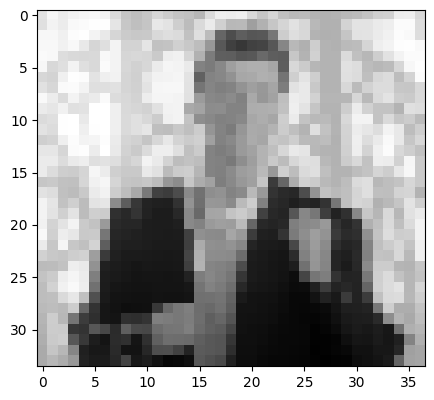

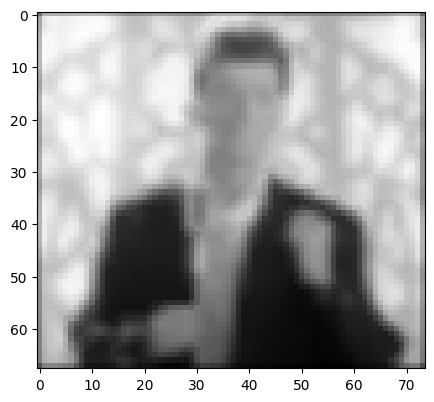

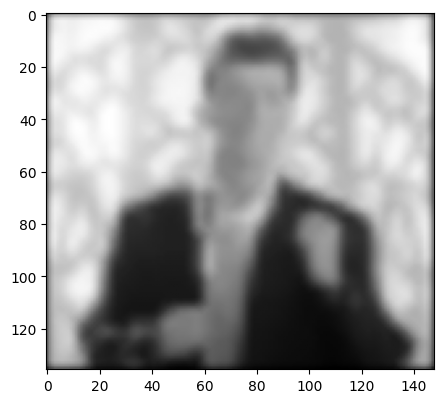

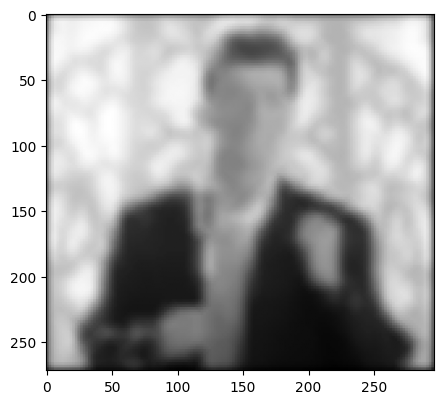

In [79]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()